# N<span style="color: #99ffff;">-</span>AND ITALIA <span style="color: #99ffff;">-</span> ADEBANJI ADELOWO

## Working with the DataBase: VENPAYBI

### The Table dbo.CoffeeCappTransByMerchantInstantKpis

In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

First establish connection to the database using python

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'vpay-asdmi.public.21203d2a181c.database.windows.net,3342' 
database = 'VENPAY-BI' 
username = 'nandaa' 
password = 'Timileyin1998'  

engine = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = engine.cursor()

In [4]:

sql = "SELECT TOP (100) * FROM CoffeeCappTransByMerchantInstantKpis"

df_coffee1 = pd.read_sql(sql, engine)
df_coffee1.head()

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,1,2022-11-30 13:55:00,1,Vending Company,0,0,0,0,0,0
1,2,2022-11-30 13:55:00,2,BiTX,0,0,0,0,0,0
2,3,2022-11-30 13:55:00,4,Vaportris,0,0,0,0,0,0
3,4,2022-11-30 13:55:00,6,EOS Srl,0,0,0,0,0,0
4,5,2022-11-30 13:55:00,7,Your Best Break,1089,915,50,98,26,0


In [5]:
df_coffee1.columns

Index(['PK_CoffeeCappTransByMerchantInstantKpisId', 'ReferenceDate',
       'EK_MerchantId', 'MerchantName', 'TotalTransactionsCounter',
       'CompletedTransactionsCounter', 'ValidationErrorsCounter',
       'ConnectionErrorsCounter', 'RejectionErrorsCounter',
       'SystemErrorsCounter'],
      dtype='object')

In [6]:
pd.crosstab(df_coffee1.ReferenceDate, df_coffee1.TotalTransactionsCounter)

TotalTransactionsCounter,0,1,2,3,4,5,6,7,9,27,30,31,37,44,61,70,75,81,1089,1204
ReferenceDate,,,,,,,,,,,,,,,,,,,,
2022-11-30 13:55:00,41,2,2,1,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0
2022-11-30 14:00:00,33,3,1,0,0,0,2,1,0,1,1,0,0,1,1,1,0,0,0,1


In [7]:
df_coffee1.describe()

,PK_CoffeeCappTransByMerchantInstantKpisId,EK_MerchantId,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.0
mean,50.500000,42.080000,28.000000,22.340000,1.77000,2.850000,1.040000,0.0
std,29.011492,22.153131,161.561447,129.057204,10.06931,17.264651,6.172471,0.0
min,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,25.750000,24.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,50.500000,46.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,75.250000,59.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.0
max,100.000000,83.000000,1204.000000,919.000000,87.00000,143.000000,55.000000,0.0


##### The total number of Coffee Transactions for each Merchant is displayed below

In [8]:

# select 26 rows from SQL table to insert in dataframe.
query = """ 
            SELECT TOP 20 EK_MerchantId, MerchantName, COUNT(*) AS TotalCount FROM CoffeeCappTransByMerchantInstantKpis
            GROUP BY EK_MerchantId, MerchantName

"""

df_coffee2 = pd.read_sql(query, engine)
df_coffee2

,EK_MerchantId,MerchantName,TotalCount
0,57,Geos Sardegna,78450
1,27,BIANCHI INDUSTRY,78450
2,2,BiTX,78450
3,56,Demomatic,78450
4,10,Aesse Service Srl,78450
5,59,Eurocedibe,78450
6,14,Serim,62153
7,63,Vat,78450
8,32,WORLD MATIC,78450
9,114,COFFEE CO SRL,11053


In [9]:
df_coffee2.describe()

,EK_MerchantId,TotalCount
count,20.000000,20.000000
mean,61.750000,67794.250000
std,33.050002,18959.116335
min,2.000000,11053.000000
25%,43.250000,63773.750000
50%,61.000000,78450.000000
75%,90.250000,78450.000000
max,114.000000,78450.000000


<Axes: xlabel='MerchantName'>

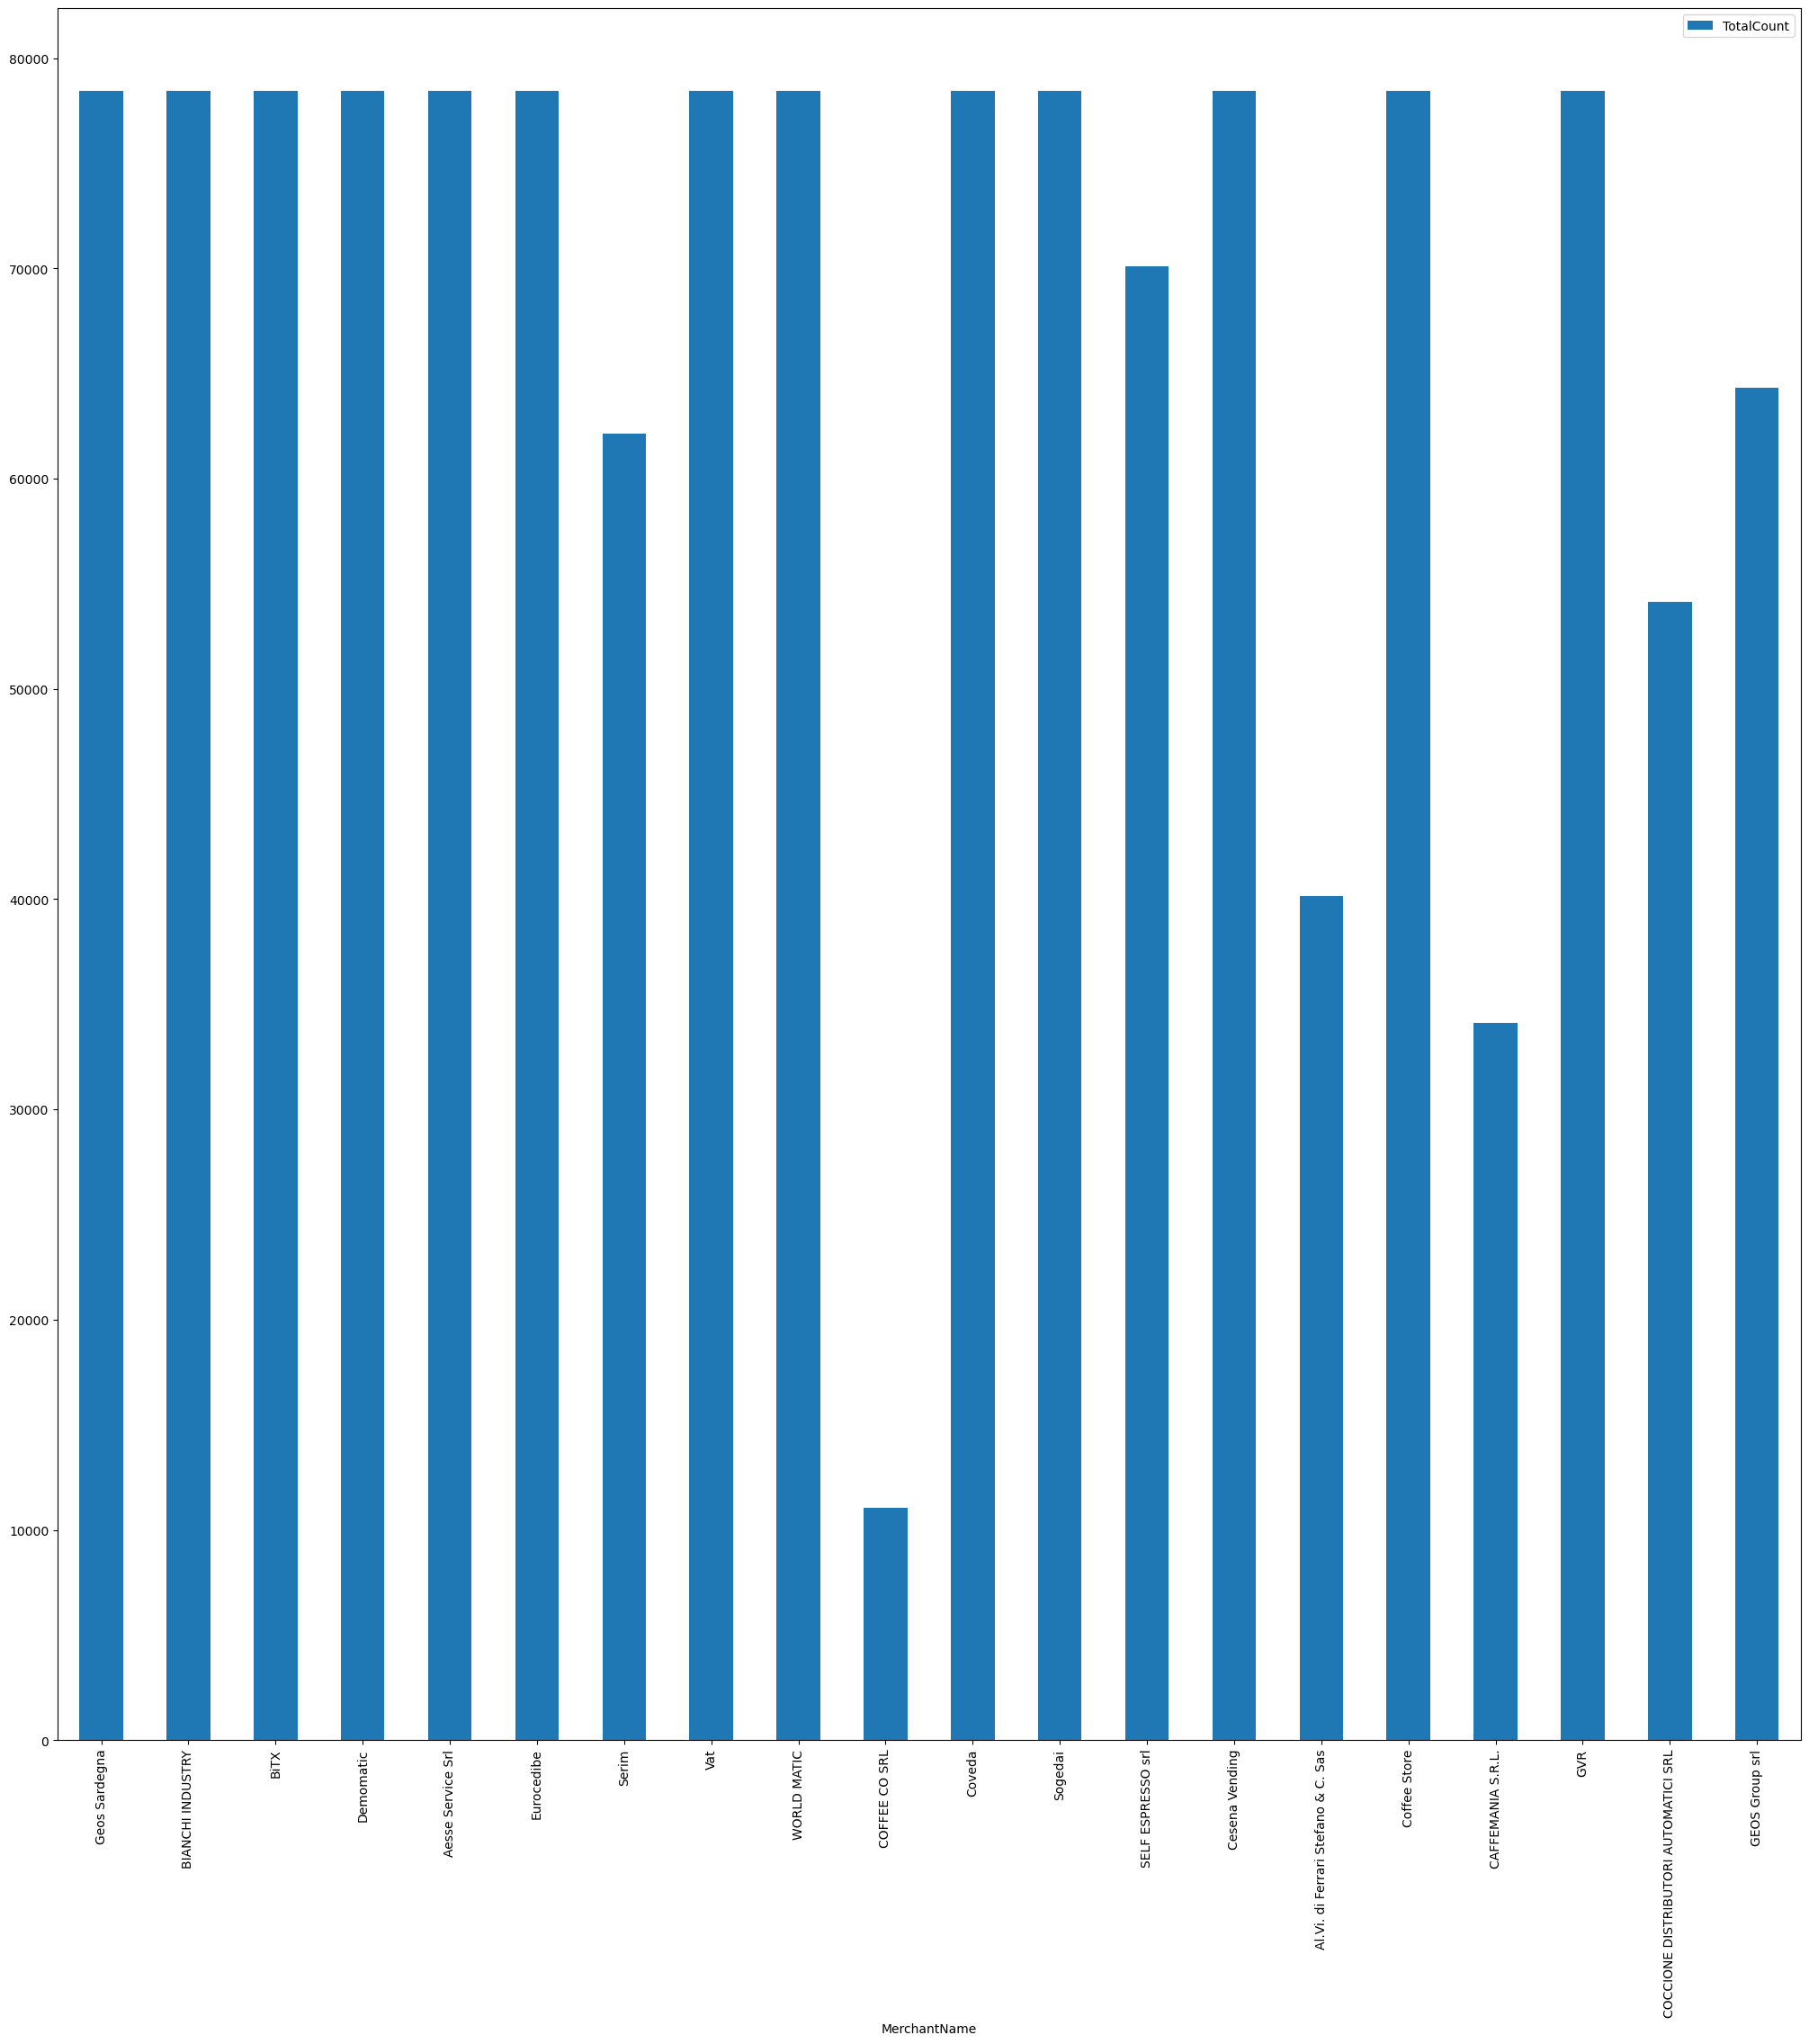

In [10]:
df_coffee2.plot(
  kind="bar",
  x="MerchantName",     
  y="TotalCount",
  figsize=(25, 25)
  )

##### The total number of Coffee Transactions for each Merchant is displayed below

In [11]:

query = """
        SELECT MerchantName, SUM(TotalTransactionsCounter) AS TotalTrans, SUM(CompletedTransactionsCounter) AS TotalCompTrans  
        FROM CoffeeCappTransByMerchantInstantKpis
        GROUP BY MerchantName
"""

df_coffee3 = pd.read_sql(query, engine)
df_coffee3

,MerchantName,TotalTrans,TotalCompTrans
0,Coveda,0,0
1,PANATTA,0,0
2,Coffee Store,0,0
3,Your Best Break,39579664,31209794
4,Liomatic,728379,533142
...,...,...,...
77,Al.Vi. di Ferrari Stefano & C. Sas,0,0
78,CoffeecApp,0,0
79,Progresso Vending s.r.l.,0,0
80,ITALIAN VENDING GROUP SRL,0,0


In [12]:
df_coffee3.describe()

,TotalTrans,TotalCompTrans
count,8.200000e+01,8.200000e+01
mean,6.081042e+05,4.830792e+05
std,4.394098e+06,3.467101e+06
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,3.327500e+02,2.537500e+02
max,3.957966e+07,3.120979e+07


<Axes: xlabel='MerchantName'>

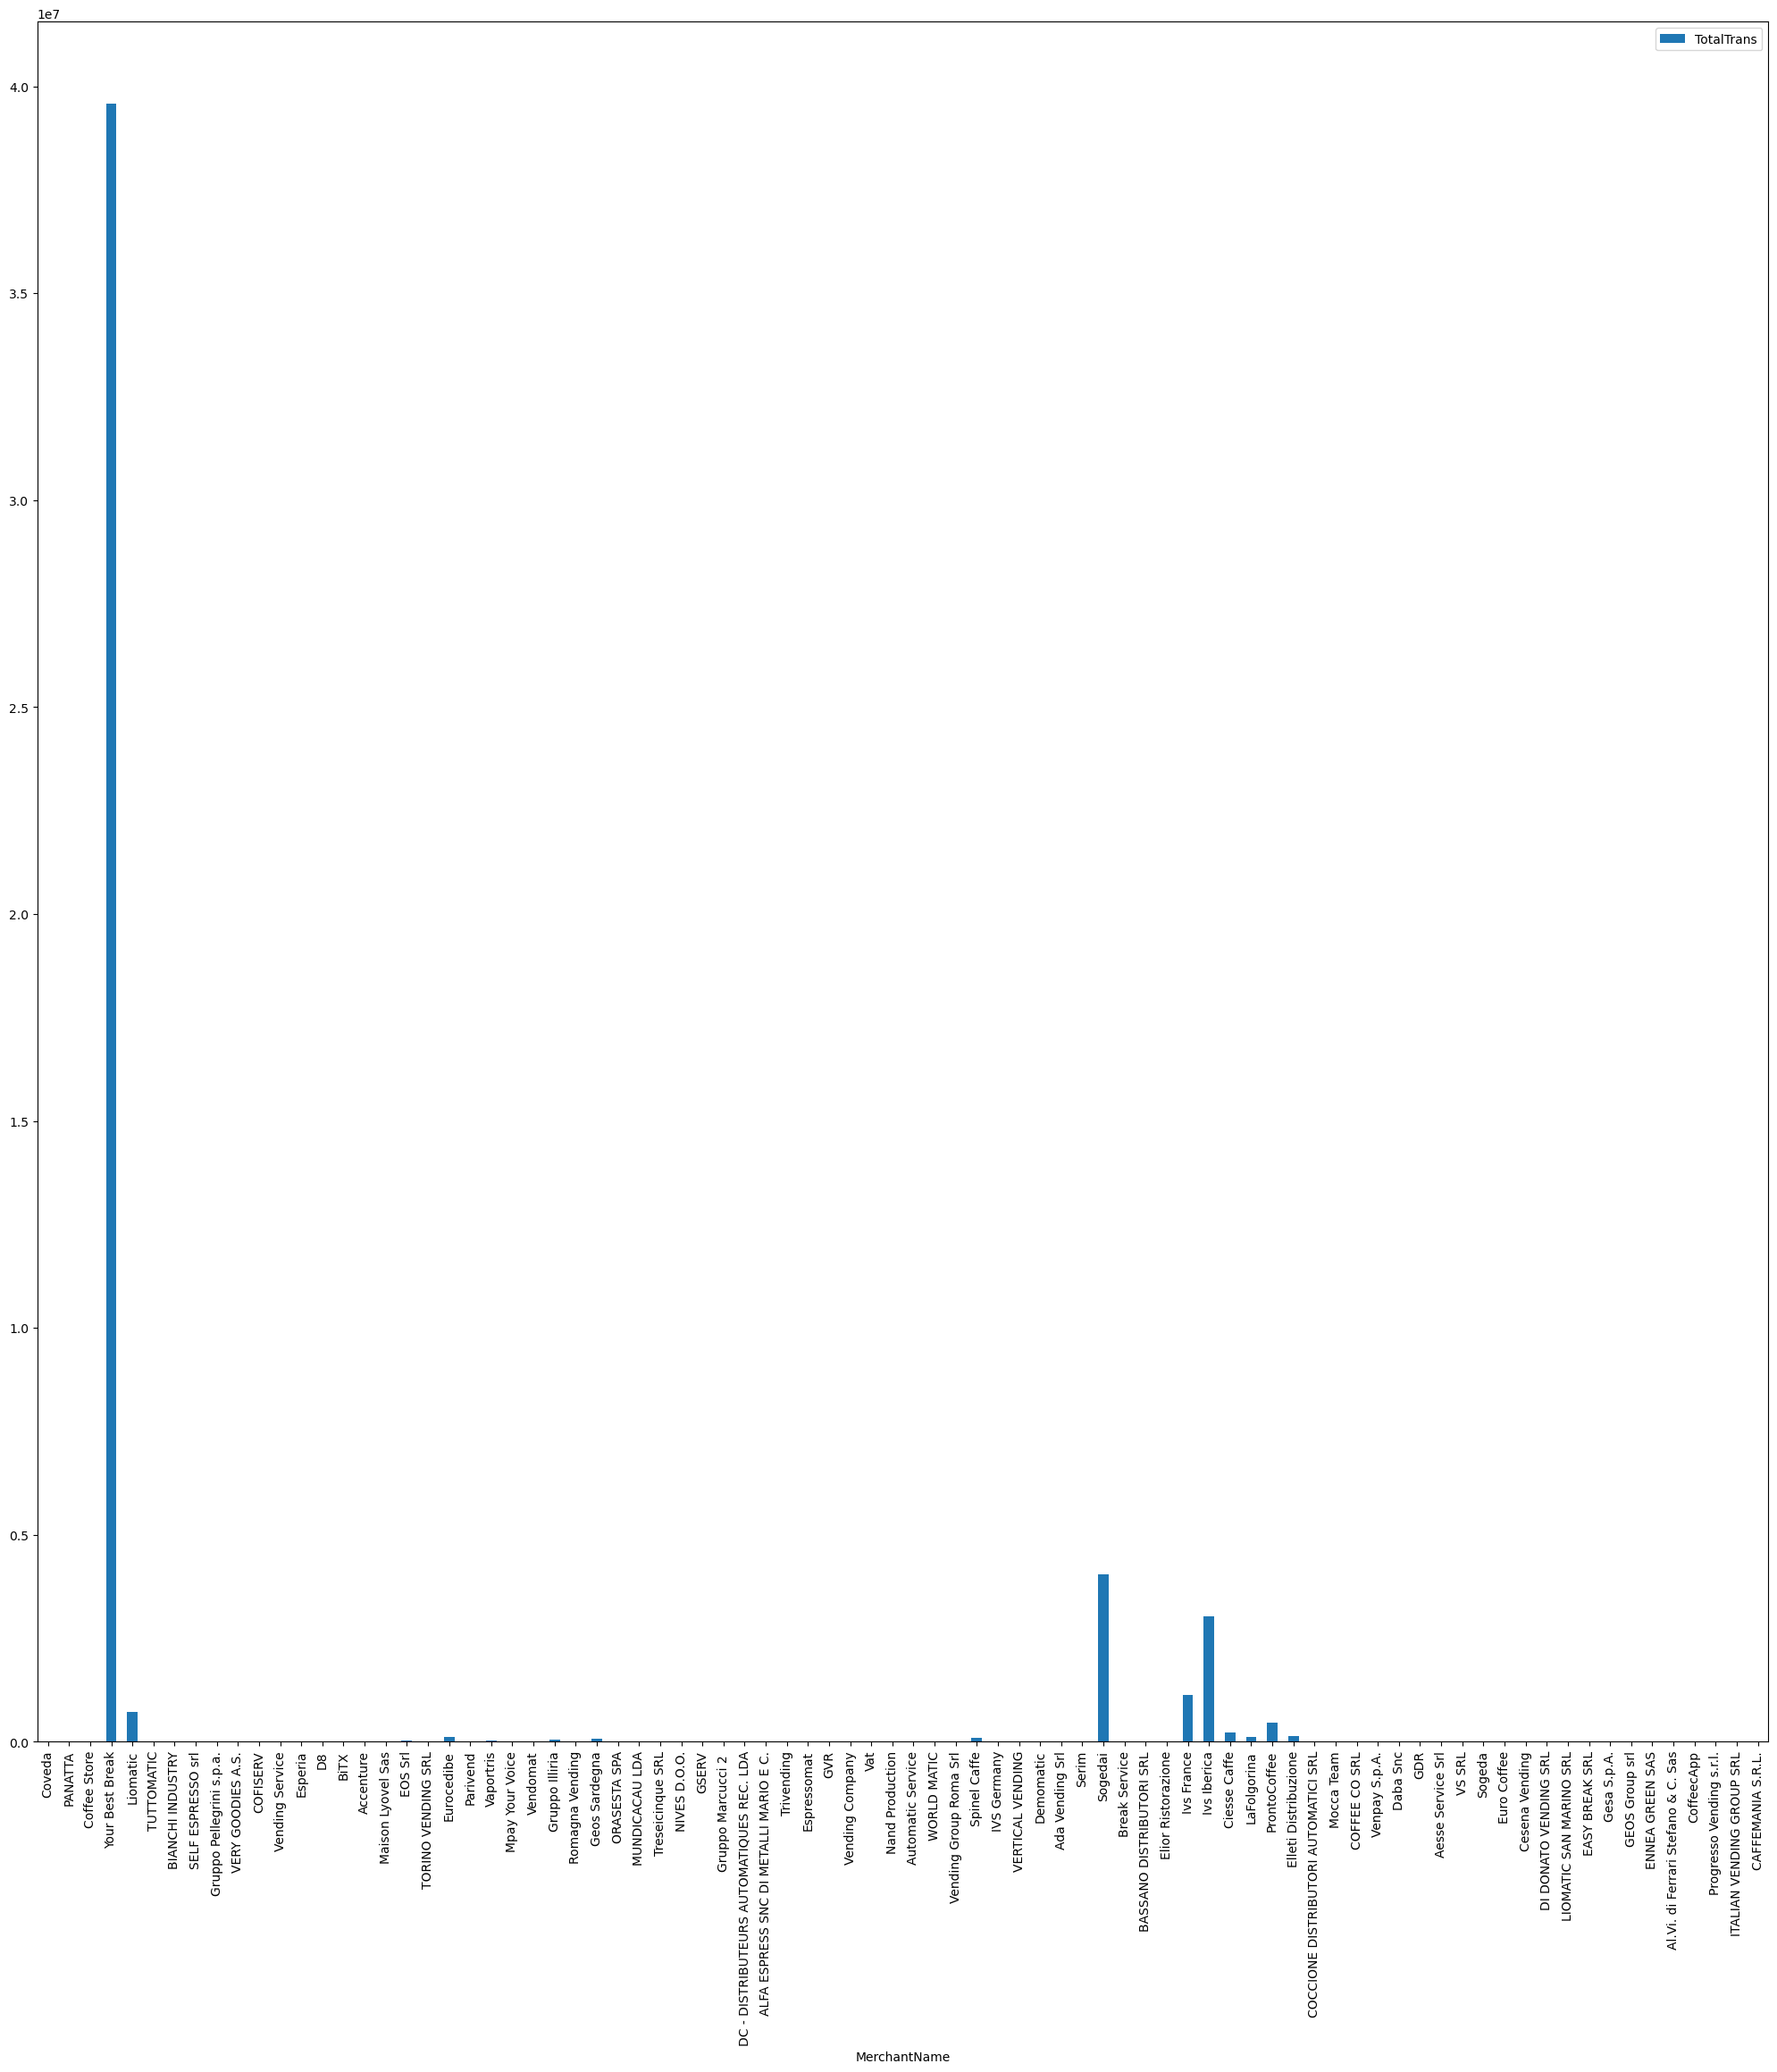

In [13]:
df_coffee3.plot(
  kind="bar",
  x="MerchantName",     
  y="TotalTrans",
  figsize=(25, 25)
  )

<Axes: xlabel='MerchantName'>

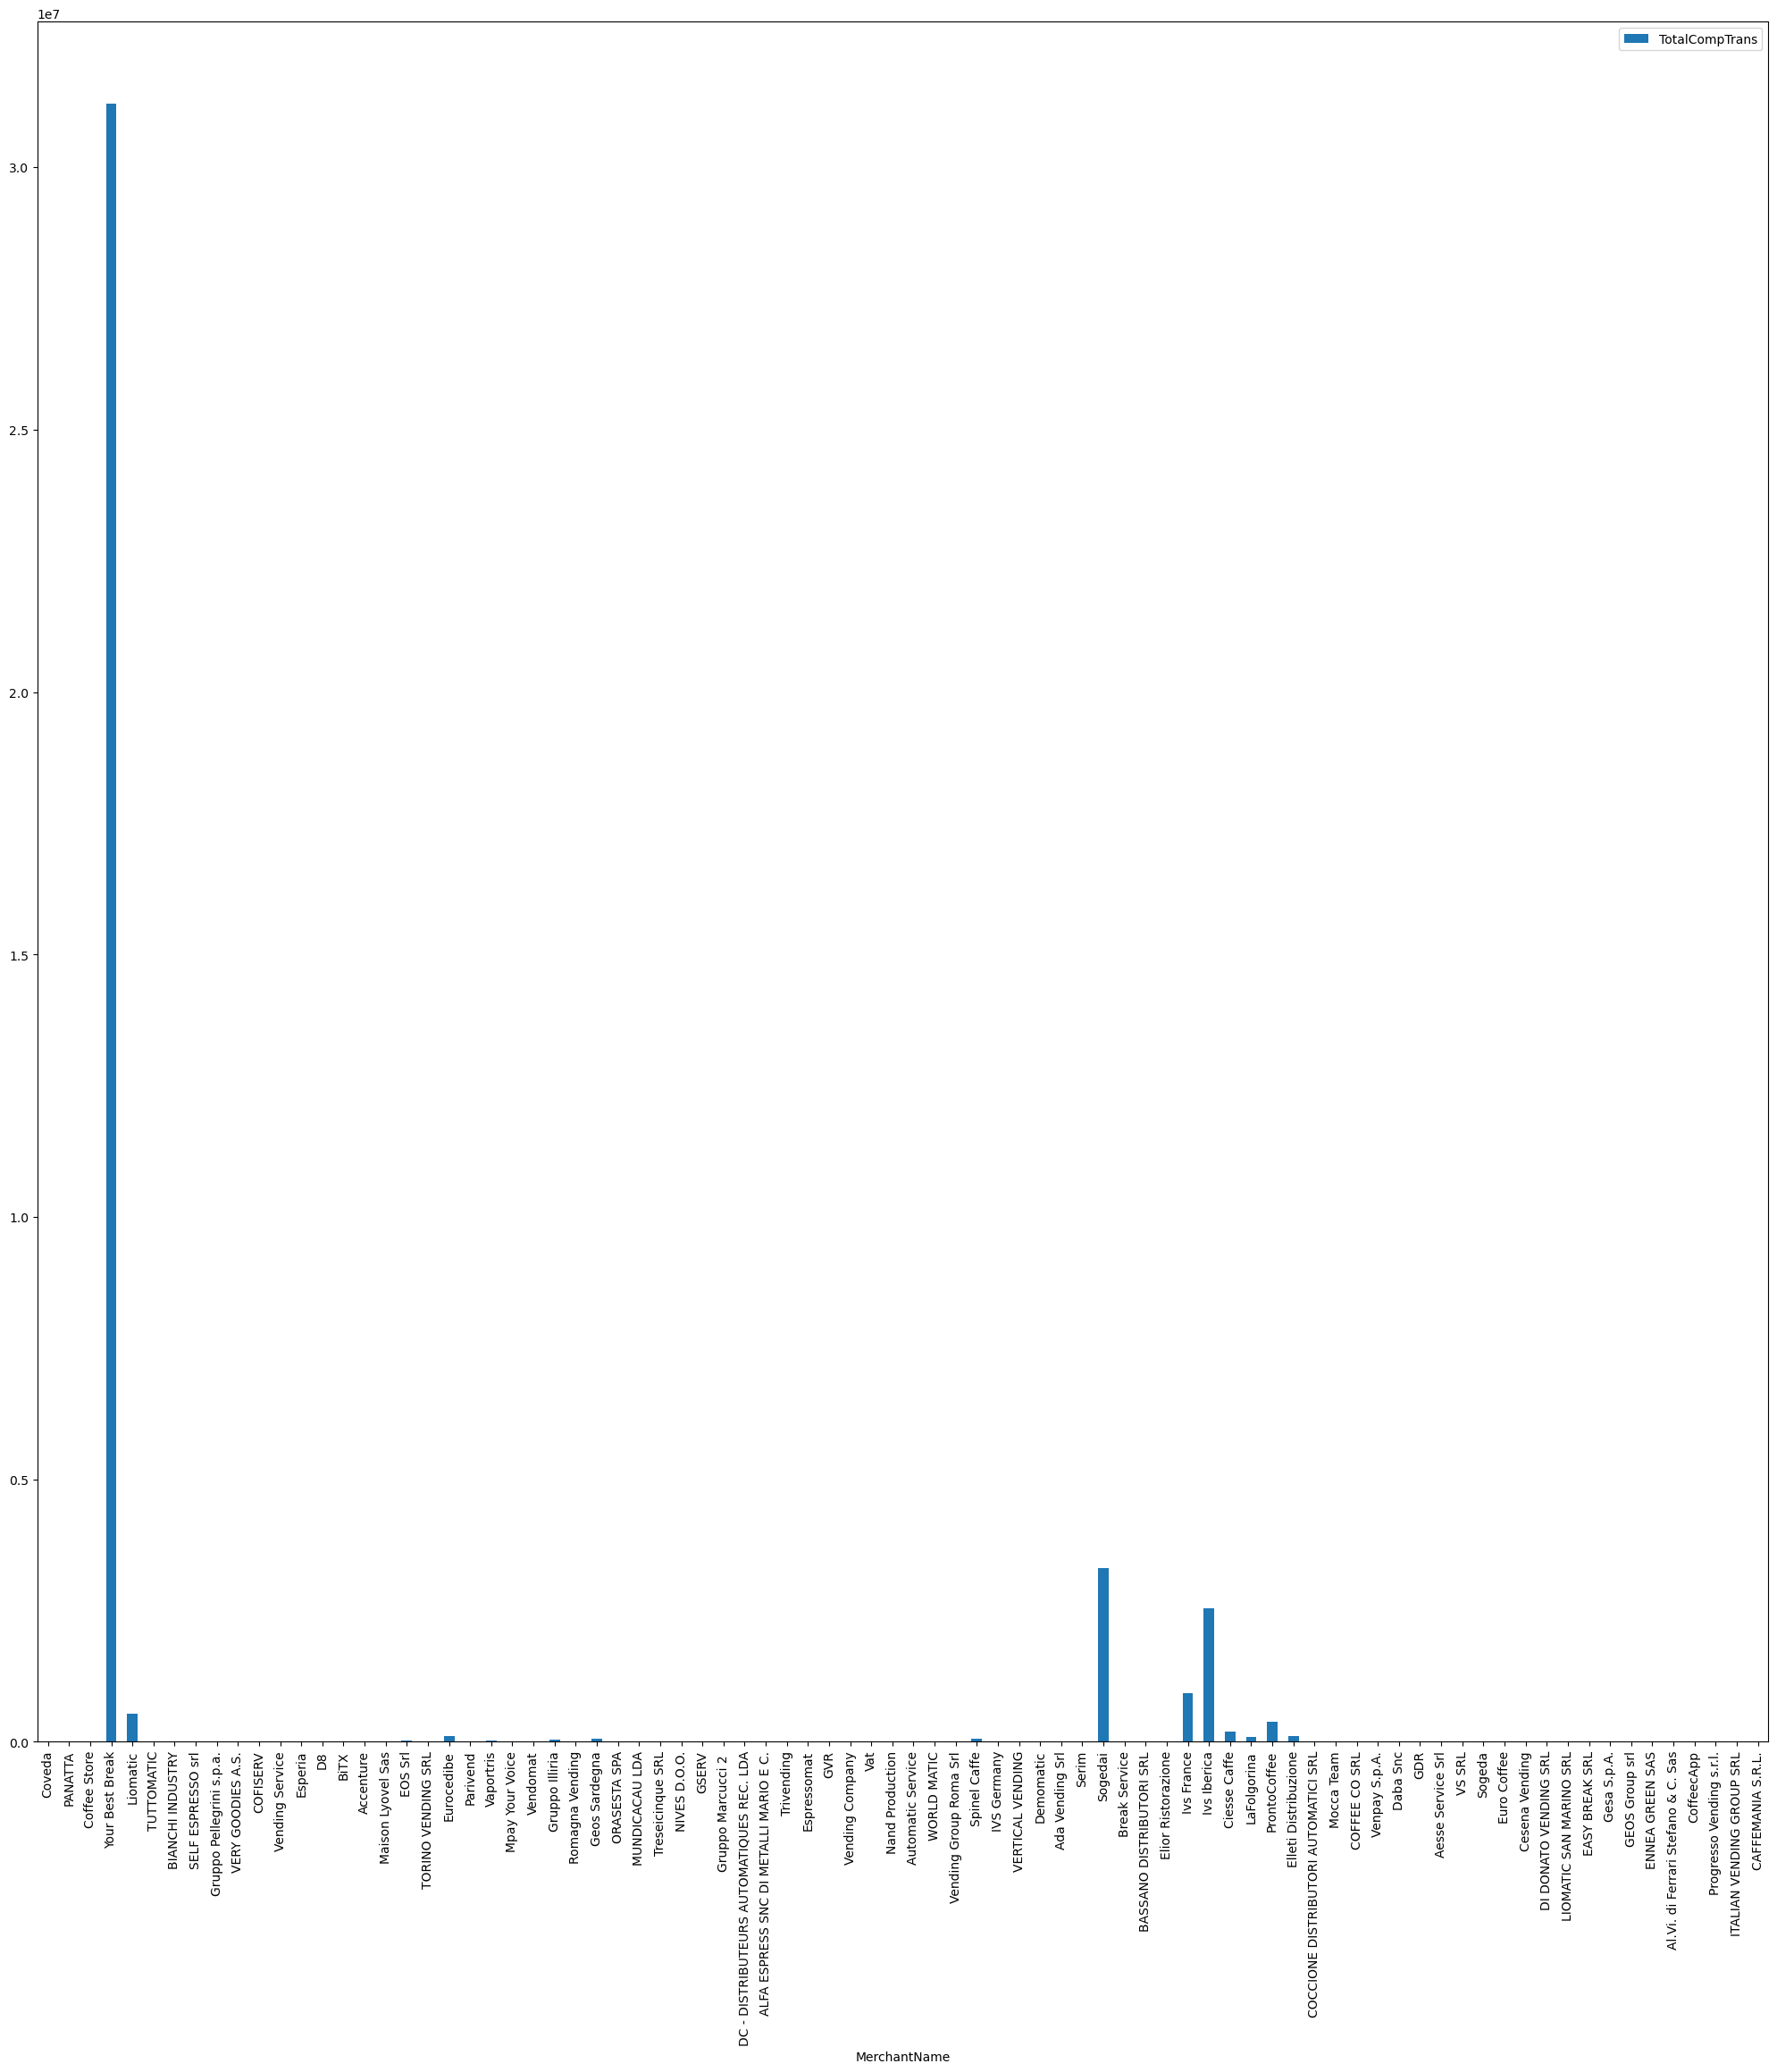

In [14]:
df_coffee3.plot(
  kind="bar",
  x="MerchantName",     
  y="TotalCompTrans",
  figsize=(25, 25)
  )